In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
# Read the SPSS Merged Median house price dataset which is available on my drive
#This data already contains no missing value and part of the preprocessing has been done in spss
df = pd.read_csv("Dataset/MergedMedianHousePrice_Deprivation_Compact1_NonMissing.csv",header=0,delimiter=',')
# Display the contents of the sheet to ensure its correct
df.head()


,LSOAcode2011,LSOAname,YearendingDec1995,YearendingDec1996,YearendingDec1997,YearendingDec1998,YearendingDec1999,YearendingDec2000,YearendingDec2001,YearendingDec2002,...,BarrierstoHousingandServicesScore,LivingEnvironmentScore,IncomeDeprivationAffectingChildrenIndexIDACIScorerate,IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate,ChildrenandYoungPeopleSubdomainScore,AdultSkillsSubdomainScore,GeographicalBarriersSubdomainScore,WiderBarriersSubdomainScore,IndoorsSubdomainScore,OutdoorsSubdomainScore
0,E01000001,City of London 001A,108500.0,150000.0,146000.0,169500.0,175500.0,245000.0,255450.0,297475.0,...,27.134,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201
1,E01000002,City of London 001B,113500.0,122500.0,130000.0,162500.0,185000.0,240025.0,265000.0,285000.0,...,26.358,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806
2,E01000003,City of London 001C,74000.0,76000.0,135000.0,121680.0,128000.0,145000.0,181750.0,206000.0,...,31.861,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913
3,E01000006,Barking and Dagenham 016A,68500.0,69500.0,47125.0,79000.0,83500.0,63247.5,100000.0,137500.0,...,39.737,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590
4,E01000010,Barking and Dagenham 015C,55625.0,52500.0,54500.0,60750.0,67000.0,87497.5,73000.0,121500.0,...,51.245,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658


In [136]:

#Confirm that all columns and cells are completely filled,there are no empty cells and data is in exact type
print("\nA Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :")
print("\nfeature_name          numbe_of_missing_values")
print(df.isnull().sum())


A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

In [137]:
#check the datatypes
print("\nDisplay data types of each features")
print(df.dtypes)


Display data types of each features
LSOAcode2011                                              object
LSOAname                                                  object
YearendingDec1995                                        float64
YearendingDec1996                                        float64
YearendingDec1997                                        float64
YearendingDec1998                                        float64
YearendingDec1999                                        float64
YearendingDec2000                                        float64
YearendingDec2001                                        float64
YearendingDec2002                                        float64
YearendingDec2003                                        float64
YearendingDec2004                                        float64
YearendingDec2005                                        float64
YearendingDec2006                                        float64
YearendingDec2007                                    

In [138]:
#Keep only required columns for this analysis
#all other years are taken away because we only want to make use of the most recent year.
columns_to_keep = ['LSOAcode2011', 'LSOAname', 'YearendingDec2021', 'IndexofMultipleDeprivationIMDScore', 'IncomeScorerate', 'EmploymentScorerate', 'EducationSkillsandTrainingScore', 'HealthDeprivationandDisabilityScore', 'CrimeScore', 'BarrierstoHousingandServicesScore', 'LivingEnvironmentScore', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate', 'ChildrenandYoungPeopleSubdomainScore', 'AdultSkillsSubdomainScore', 'GeographicalBarriersSubdomainScore', 'WiderBarriersSubdomainScore', 'IndoorsSubdomainScore', 'OutdoorsSubdomainScore']
df = df[columns_to_keep]
column_mapping = {
    'LSOAcode2011': 'LSOACode',
    'LSOAname': 'LSOAName',
    'YearendingDec2021': 'HousePrice', 
    'IndexofMultipleDeprivationIMDScore': 'IMDScore',
    'IncomeScorerate': 'IncDepriv', 
    'EmploymentScorerate': 'EmpDepriv',  
    'EducationSkillsandTrainingScore': 'EduSklDepriv',
    'HealthDeprivationandDisabilityScore': 'HealthDepriv',
    'CrimeScore': 'CrimScore',
    'BarrierstoHousingandServicesScore': 'HousServDepriv', 
    'LivingEnvironmentScore': 'LivEnvDepriv', 
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate': 'ChildIncDepriv',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate': 'OldPplIncDepriv',
    'ChildrenandYoungPeopleSubdomainScore': 'ChildYPDepriv', 
    'AdultSkillsSubdomainScore': 'AdultSklDepriv',
    'GeographicalBarriersSubdomainScore': 'GeoBarDepriv',
    'WiderBarriersSubdomainScore': 'WiderBarDepriv',  
    'IndoorsSubdomainScore': 'IndoorDepriv',  
    'OutdoorsSubdomainScore': 'OutdoorDepriv'  
}

# Now rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# View the DataFrame
df.head()


,LSOACode,LSOAName,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
0,E01000001,City of London 001A,840000.0,6.063,0.011,0.015,0.021,-1.918,-1.649,27.134,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201
1,E01000002,City of London 001B,817500.0,6.255,0.012,0.017,0.040,-1.931,-1.692,26.358,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806
2,E01000003,City of London 001C,540000.0,19.548,0.105,0.088,9.612,0.321,-0.987,31.861,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913
3,E01000006,Barking and Dagenham 016A,410000.0,22.568,0.133,0.094,14.525,-0.390,0.746,39.737,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590
4,E01000010,Barking and Dagenham 015C,200000.0,30.914,0.197,0.078,13.277,0.139,1.111,51.245,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658


In [139]:
#Lets start by simply grouping our column names so we can access them easily at any point in time.
allFeatures = [] # : all features would be stored here
allNumericFeatures = [] # : all features to be normalized or all numeric features
featuresNormalized = [] # : all features wwill eventually be normalized into these designated columns these columns 
                            #would have _n to their names
for column in df.columns:
    if df[column].dtype == 'float64':  # Check that type is float
        #Tis feature has to be normalized
            featuresNormalized.append(column+"_n")
            allNumericFeatures.append(column)

    allFeatures.append(column) #Stores all the columns or features of these dataset : wether it is old or freshly created


#I am verifying I have what into expected in my respective variables
print("\nfeatures that would be normalized ")
print(allNumericFeatures)
print("\nfeatures would be normalized into these columns : ")
print(featuresNormalized)
print("\nThese all all the features of this data set: ")
print(allFeatures)




features that would be normalized 
['HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']

features would be normalized into these columns : 
['HousePrice_n', 'IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']

These all all the features of this data set: 
['LSOACode', 'LSOAName', 'HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDep

## Detect and Remove Outliers

In [140]:
#Describe the data
df.describe()

,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
count,2.800300e+04,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.00000,28003.00000,28003.000000,28003.000000,28003.000000,28003.000000
mean,3.304608e+05,18.496469,0.123967,0.105000,18.538482,-0.136062,-0.086894,20.569597,21.210415,0.158391,0.158745,-0.09915,0.28852,0.054946,-0.380617,0.008387,-0.083592
std,2.253957e+05,12.755733,0.082372,0.062715,15.623388,0.824957,0.757649,10.052030,15.840132,0.113212,0.101059,0.76696,0.10022,0.788602,2.203722,0.871230,0.821654
min,2.550000e+04,0.477000,0.005000,0.004000,0.006000,-3.329000,-2.689000,0.439000,0.151000,0.004000,0.007000,-2.86100,0.03100,-2.801000,-9.060000,-3.429000,-3.839000
25%,1.949950e+05,8.849500,0.061000,0.059000,6.515000,-0.689000,-0.624000,13.007000,8.718000,0.069000,0.082000,-0.62700,0.21700,-0.477000,-1.900000,-0.601000,-0.646000
50%,2.800000e+05,15.303000,0.101000,0.088000,14.131000,-0.138000,-0.094000,19.275000,16.804000,0.127000,0.132000,-0.10300,0.28300,0.022000,-0.507000,0.013000,-0.097000
75%,4.000000e+05,25.133000,0.169000,0.136000,26.490500,0.418000,0.443000,26.598500,30.345000,0.226000,0.213000,0.42700,0.35500,0.535500,1.064000,0.619500,0.446000
max,4.947500e+06,92.601000,0.564000,0.568000,99.500000,3.127000,2.885000,61.965000,93.352000,0.860000,0.980000,2.90600,0.66600,3.247000,6.805000,2.997000,3.212000


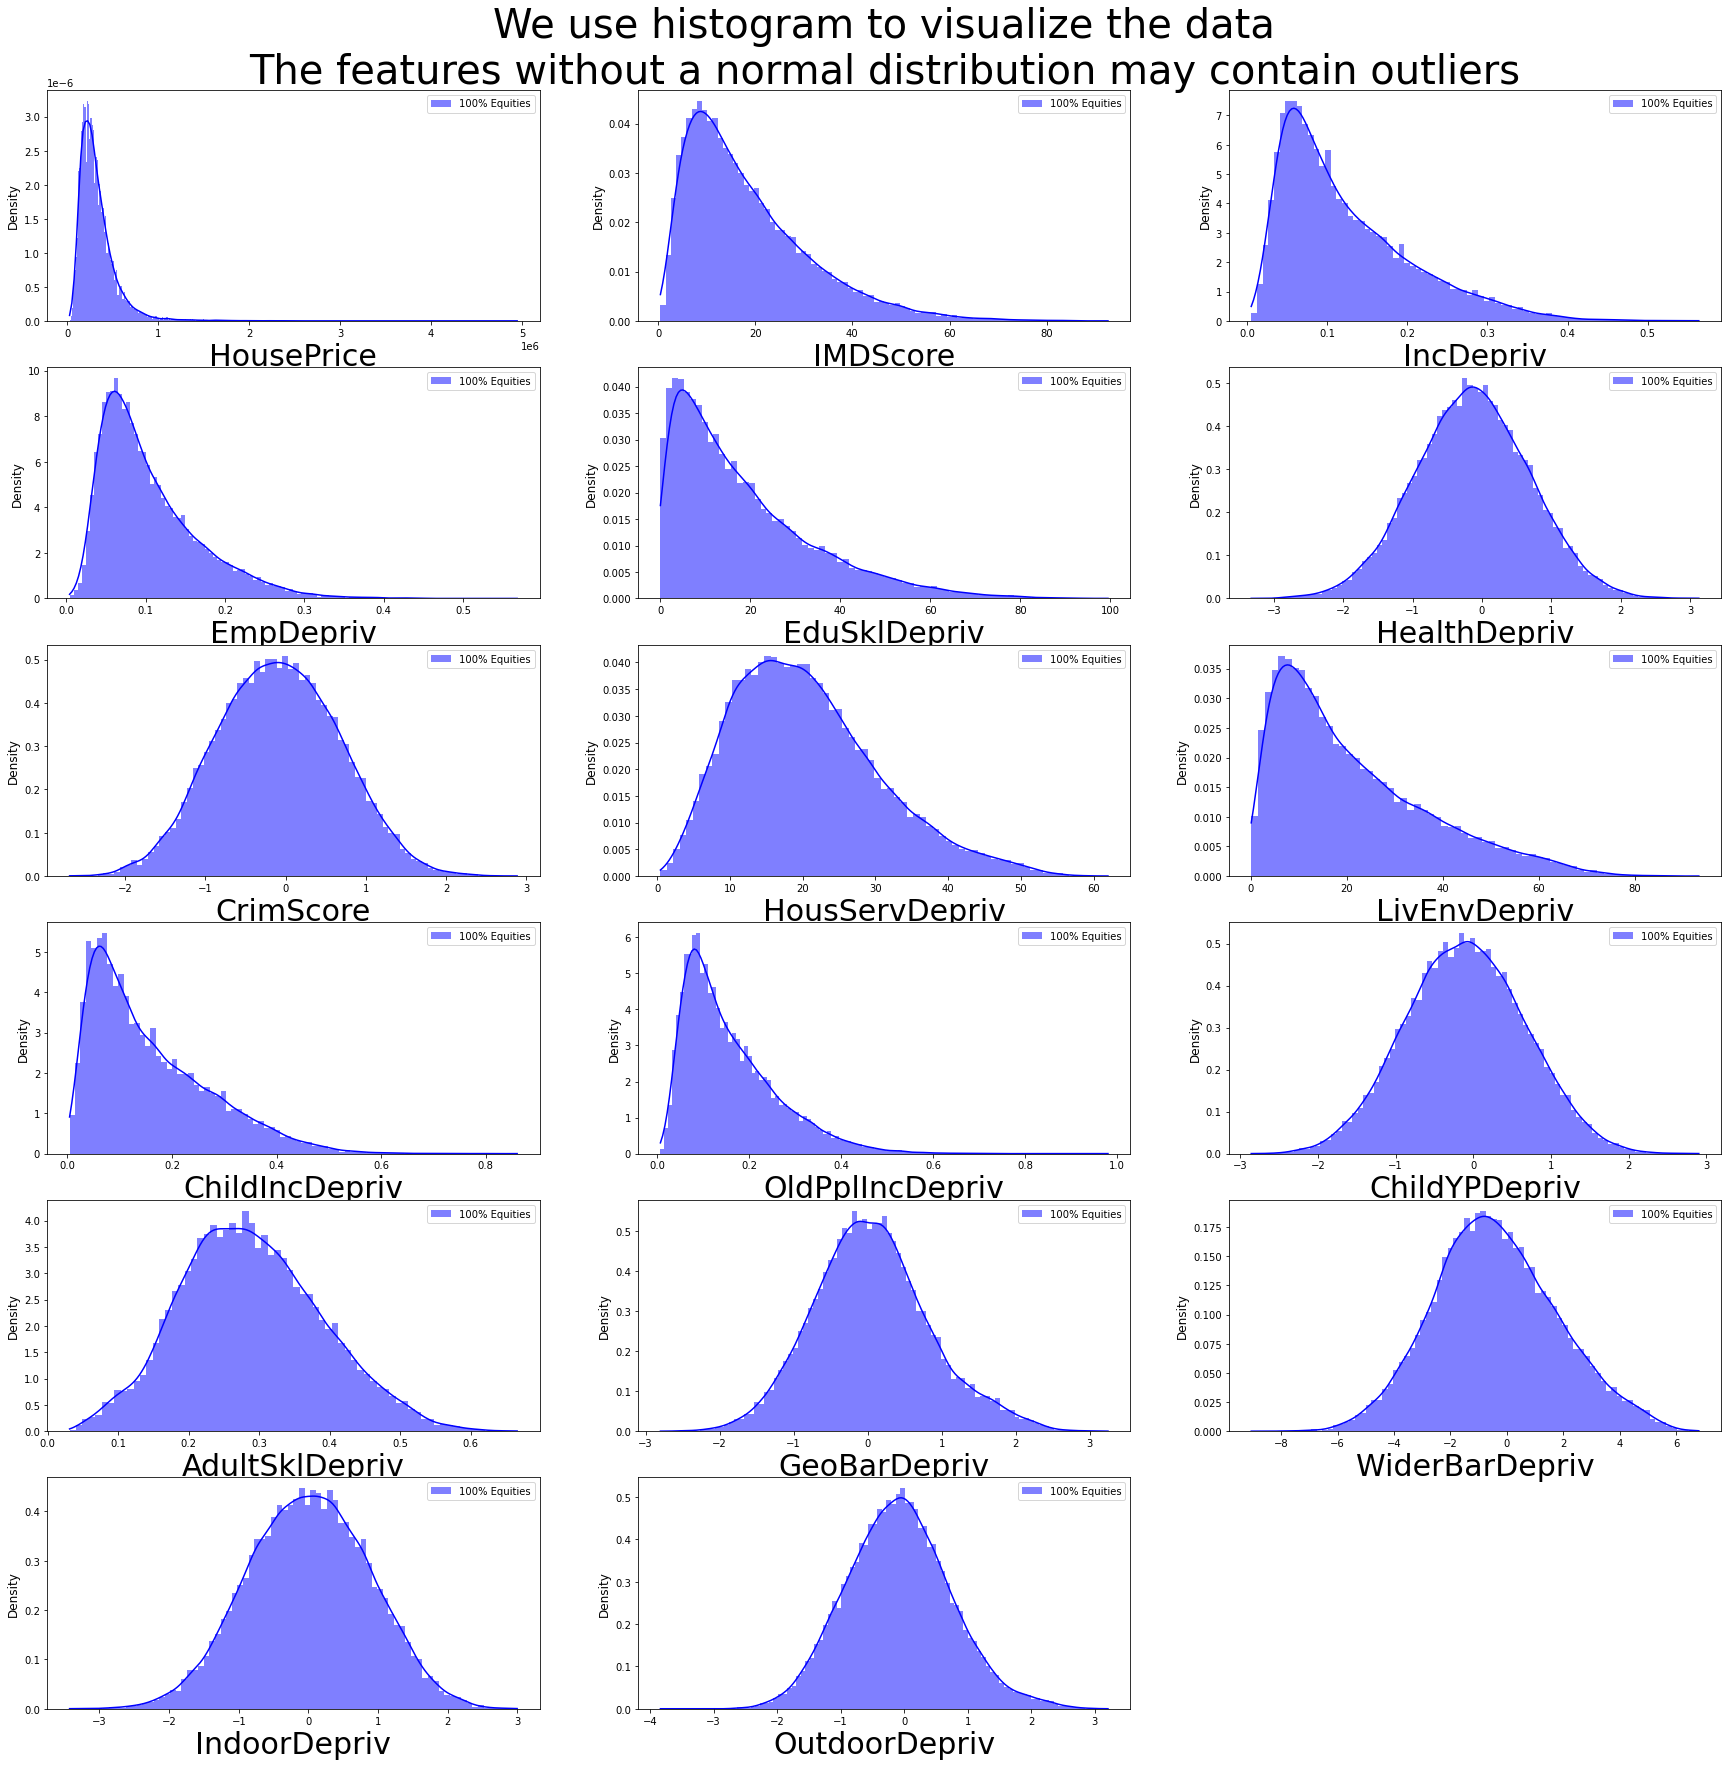

In [164]:
#we use histogram to visualize the data
#the features which dont have a normal distribution are likely to contain outliers
# from the histogram the following have oultliers YearendingDec2021', 'IndexofMultipleDeprivationIMDScore',
#'IncomeScorerate','EmploymentScorerate', 'EducationSkillsandTrainingScore','LivingEnvironmentScore',
#'IncomeDeprivationAffectingChildrenIndexIDACIScorerate','IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate
columns_to_plot = allNumericFeatures

#plt.suptitle("Histograms of Numeric Features with Potential Outliers", fontsize=24, y=0.95)
num_rows = 8  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_to_plot) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=30)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend()

# Remove any empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.title("We use histogram to visualize the data\nThe features without a normal distribution may contain outliers", fontsize=40, y=7)
#plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

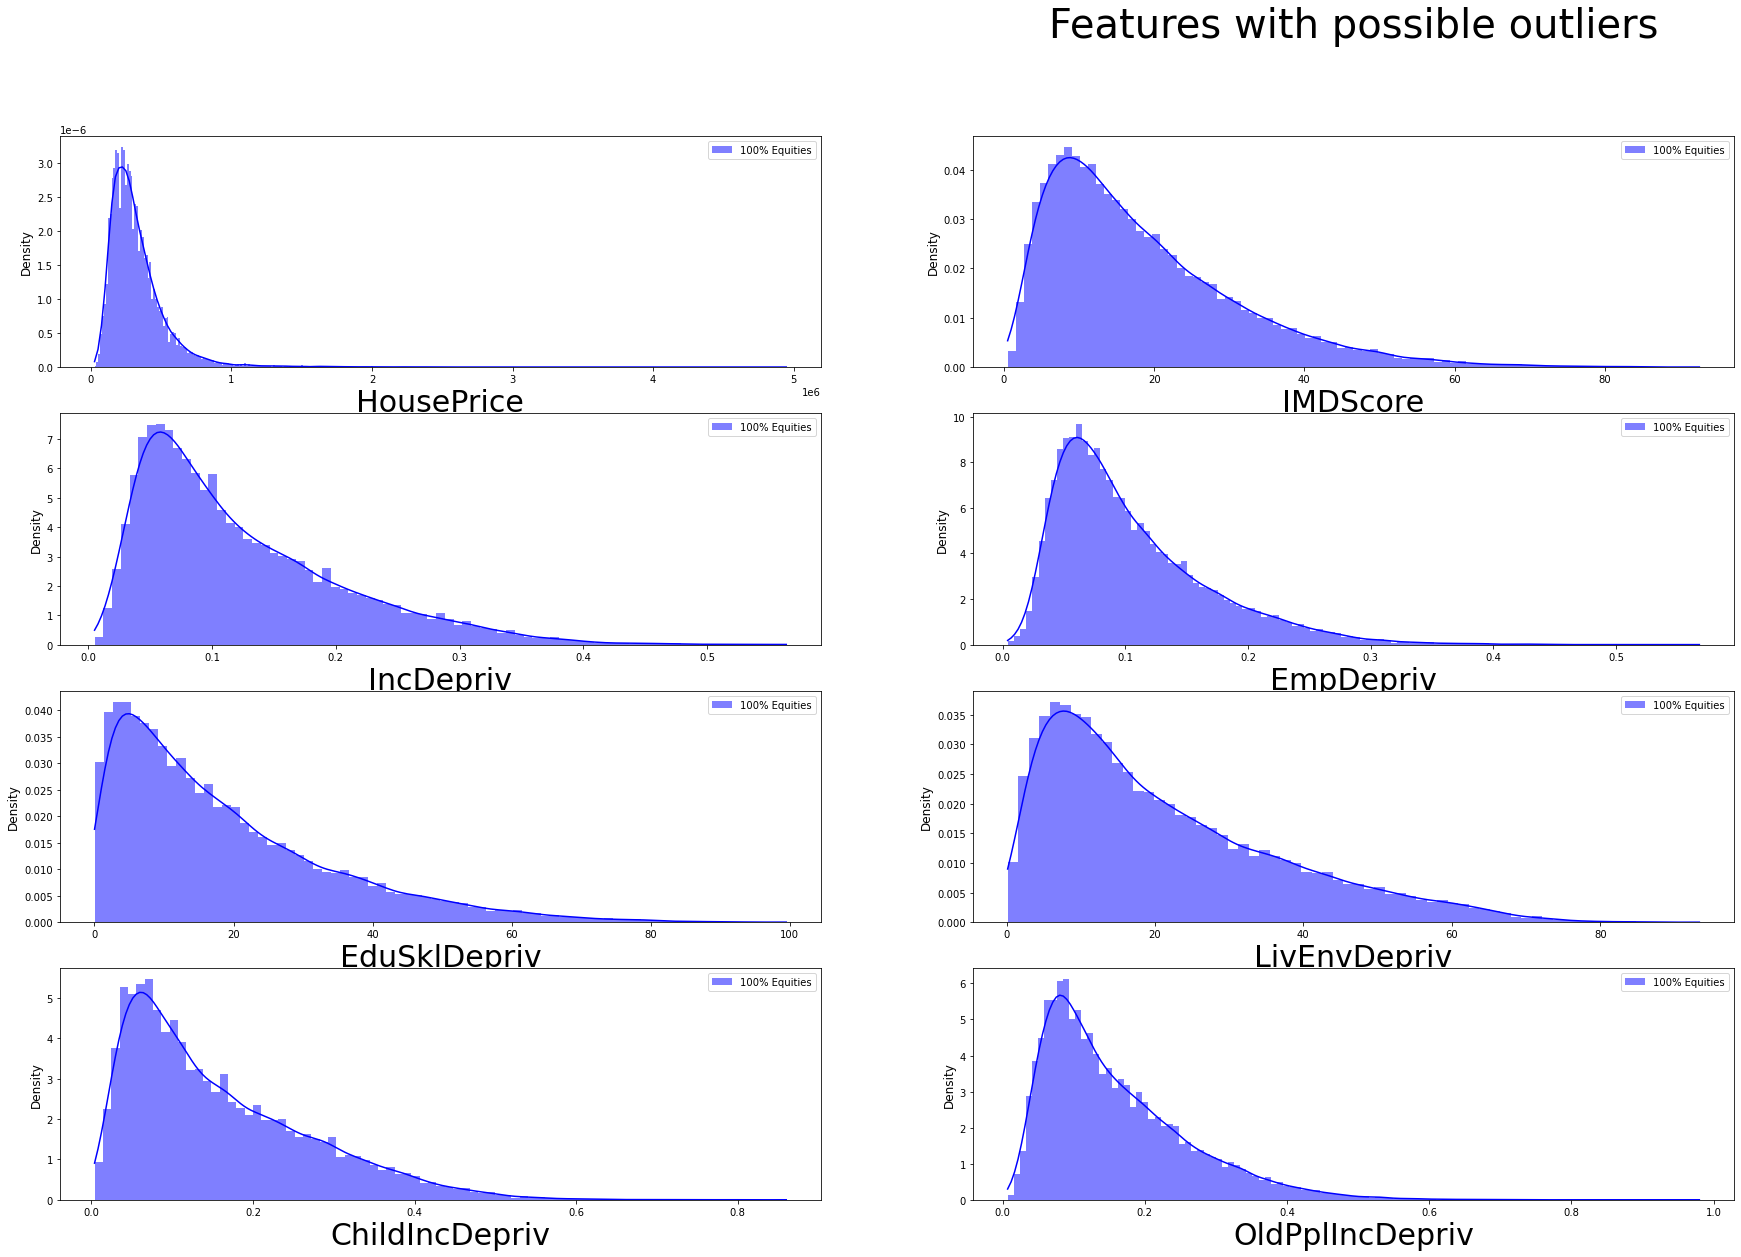

In [166]:
#we visualize the features with outliers which is see in the histogram below
columns_with_outliers =  ['HousePrice', 'IMDScore', 'IncDepriv',
                          'EmpDepriv', 'EduSklDepriv','LivEnvDepriv',
                          'ChildIncDepriv','OldPplIncDepriv']


columns_to_plot = columns_with_outliers

plt.suptitle("Histograms of Numeric Features with Potential Outliers", fontsize=24, y=0.95)
num_rows = 8  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_to_plot) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=30)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend()


# Remove any empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

#plt.tight_layout()
plt.title("Features with possible outliers", fontsize=40, y=5)
plt.show()


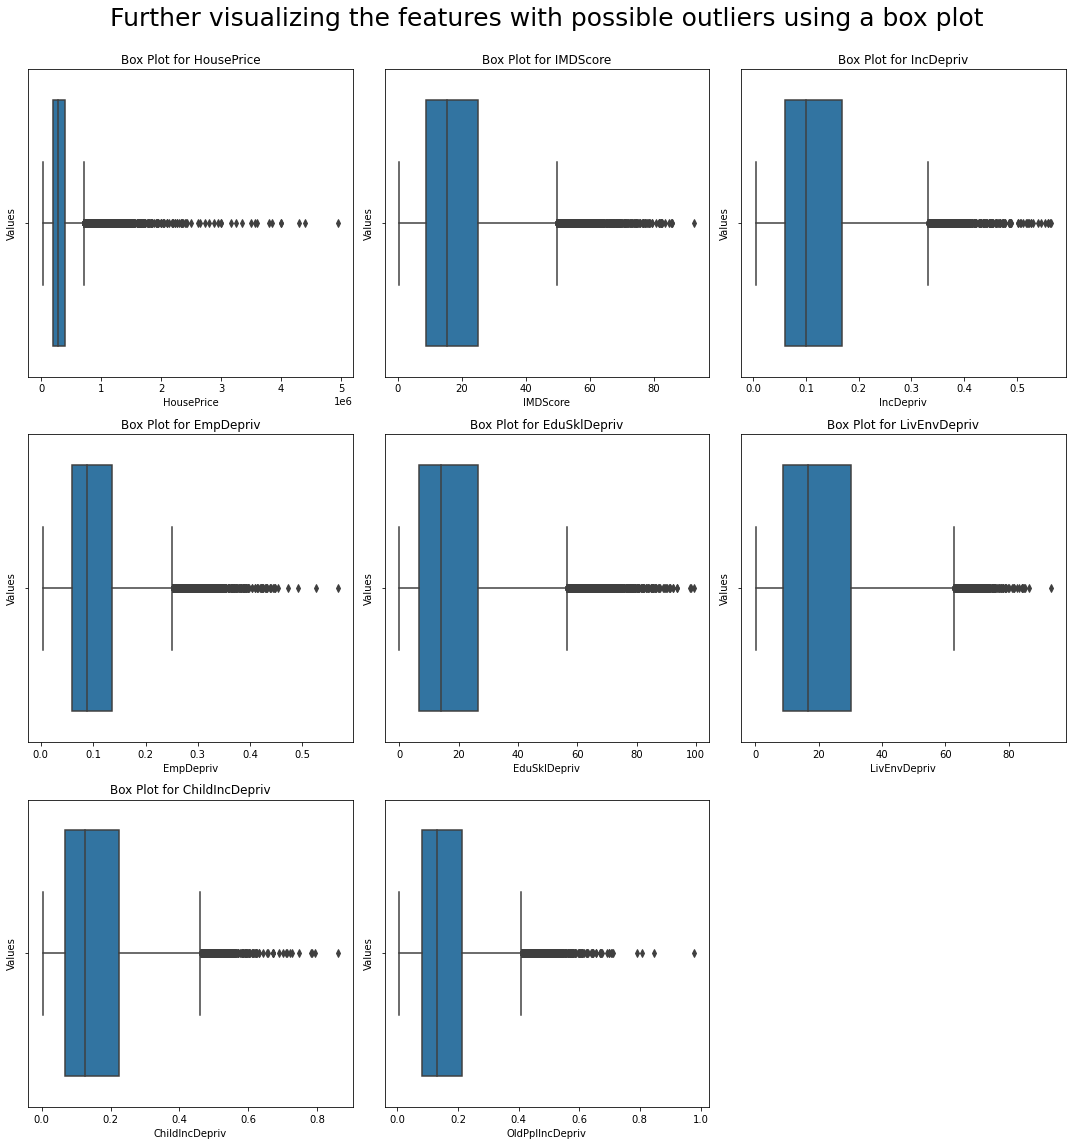

In [176]:
# Further visualizing the outliers
columns_with_outliers =  ['HousePrice', 'IMDScore', 'IncDepriv',
                          'EmpDepriv', 'EduSklDepriv','LivEnvDepriv',
                          'ChildIncDepriv','OldPplIncDepriv']

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Further visualizing the features with possible outliers using a box plot", fontsize=25, y=3.5)
plt.show()


# Removing outliers using Z-score method

Column: HousePrice
Upper limit: 1006647.8850594109
Lower limit: -345726.3194057309
Before removing outliers: 28003
After removing outliers: 27600
Outliers: 403


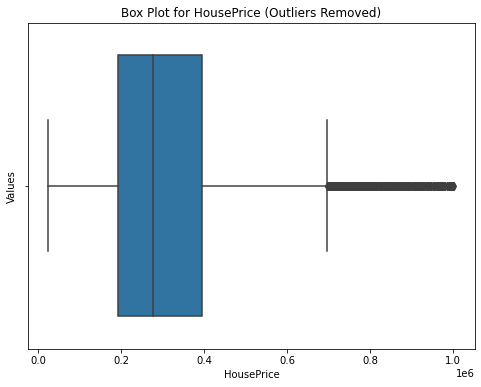

Column: IMDScore
Upper limit: 56.97492645848932
Lower limit: -19.765851603416696
Before removing outliers: 27600
After removing outliers: 27251
Outliers: 349


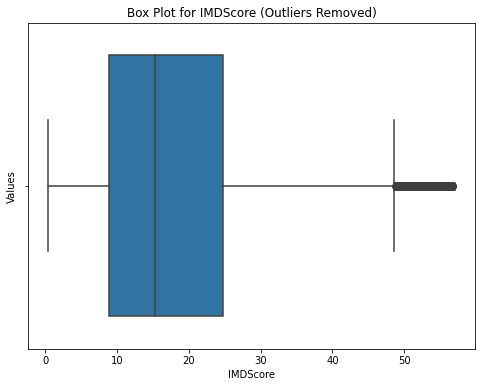

Column: IncDepriv
Upper limit: 0.3517641514838216
Lower limit: -0.10884521272928034
Before removing outliers: 27251
After removing outliers: 27101
Outliers: 150


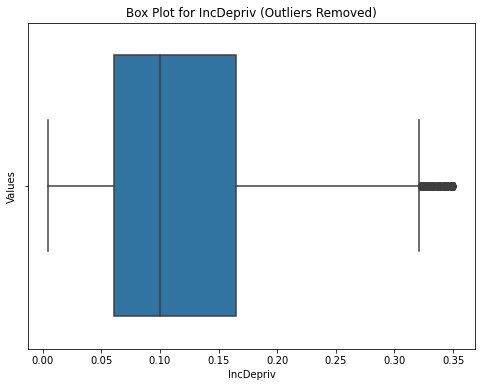

Column: EmpDepriv
Upper limit: 0.27096451309042824
Lower limit: -0.06669529793231527
Before removing outliers: 27101
After removing outliers: 26907
Outliers: 194


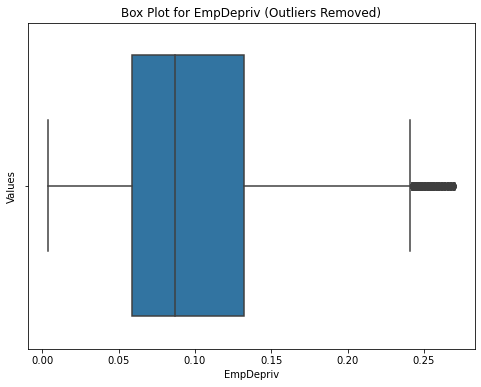

Column: EduSklDepriv
Upper limit: 61.17820038535184
Lower limit: -25.531303667025853
Before removing outliers: 26907
After removing outliers: 26603
Outliers: 304


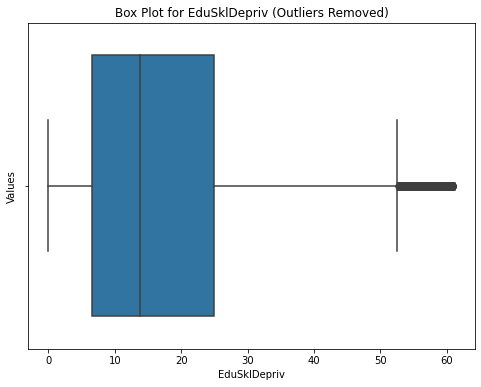

Column: LivEnvDepriv
Upper limit: 66.61683088671367
Lower limit: -25.42366846142344
Before removing outliers: 26603
After removing outliers: 26456
Outliers: 147


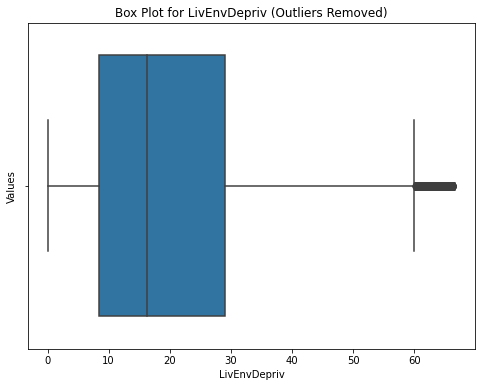

Column: ChildIncDepriv
Upper limit: 0.454834569021555
Lower limit: -0.15563196847725586
Before removing outliers: 26456
After removing outliers: 26324
Outliers: 132


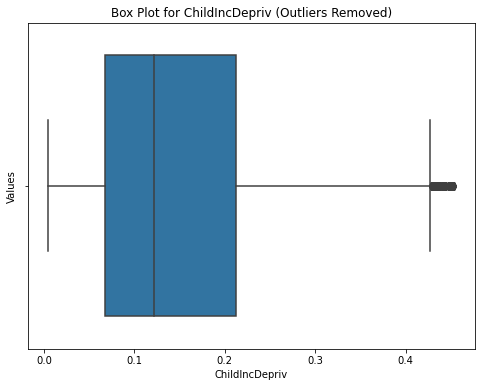

Column: OldPplIncDepriv
Upper limit: 0.4277679637086043
Lower limit: -0.12645699273154914
Before removing outliers: 26324
After removing outliers: 26014
Outliers: 310


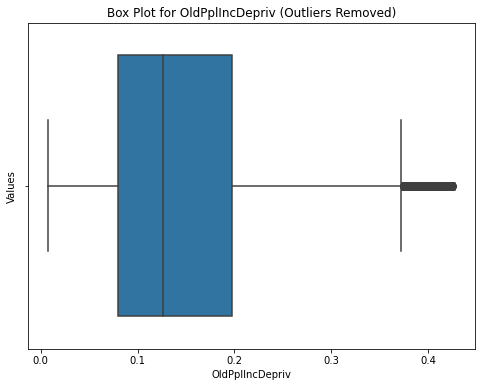

In [131]:

df_With_Outliers = df
zScore = 3 #If you intend to make outlier detection more strict please increase this value

# Assuming 'df' is your DataFrame containing the data
columns_with_outliers =  ['HousePrice', 'IMDScore', 'IncDepriv',
                          'EmpDepriv', 'EduSklDepriv','LivEnvDepriv',
                          'ChildIncDepriv','OldPplIncDepriv']

# Calculate the limits and remove outliers for each column
for column in columns_with_outliers:
    upper_limit = df_With_Outliers[column].mean() + zScore * df_With_Outliers[column].std()
    lower_limit = df_With_Outliers[column].mean() - zScore * df_With_Outliers[column].std()

    df_no_outliers = df_With_Outliers.loc[(df_With_Outliers[column] <= upper_limit) & (df_With_Outliers[column] >= lower_limit)]

    print(f'Column: {column}')
    print('Upper limit:', upper_limit)
    print('Lower limit:', lower_limit)
    print('Before removing outliers:', len(df_With_Outliers))
    print('After removing outliers:', len(df_no_outliers))
    print('Outliers:', len(df_With_Outliers) - len(df_no_outliers))
    df_With_Outliers = df_no_outliers

    # Plot the box plot for the column after removing outliers
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(data=df_no_outliers, x=column)
    plt.title(f'Box Plot for {column} (Outliers Removed)')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


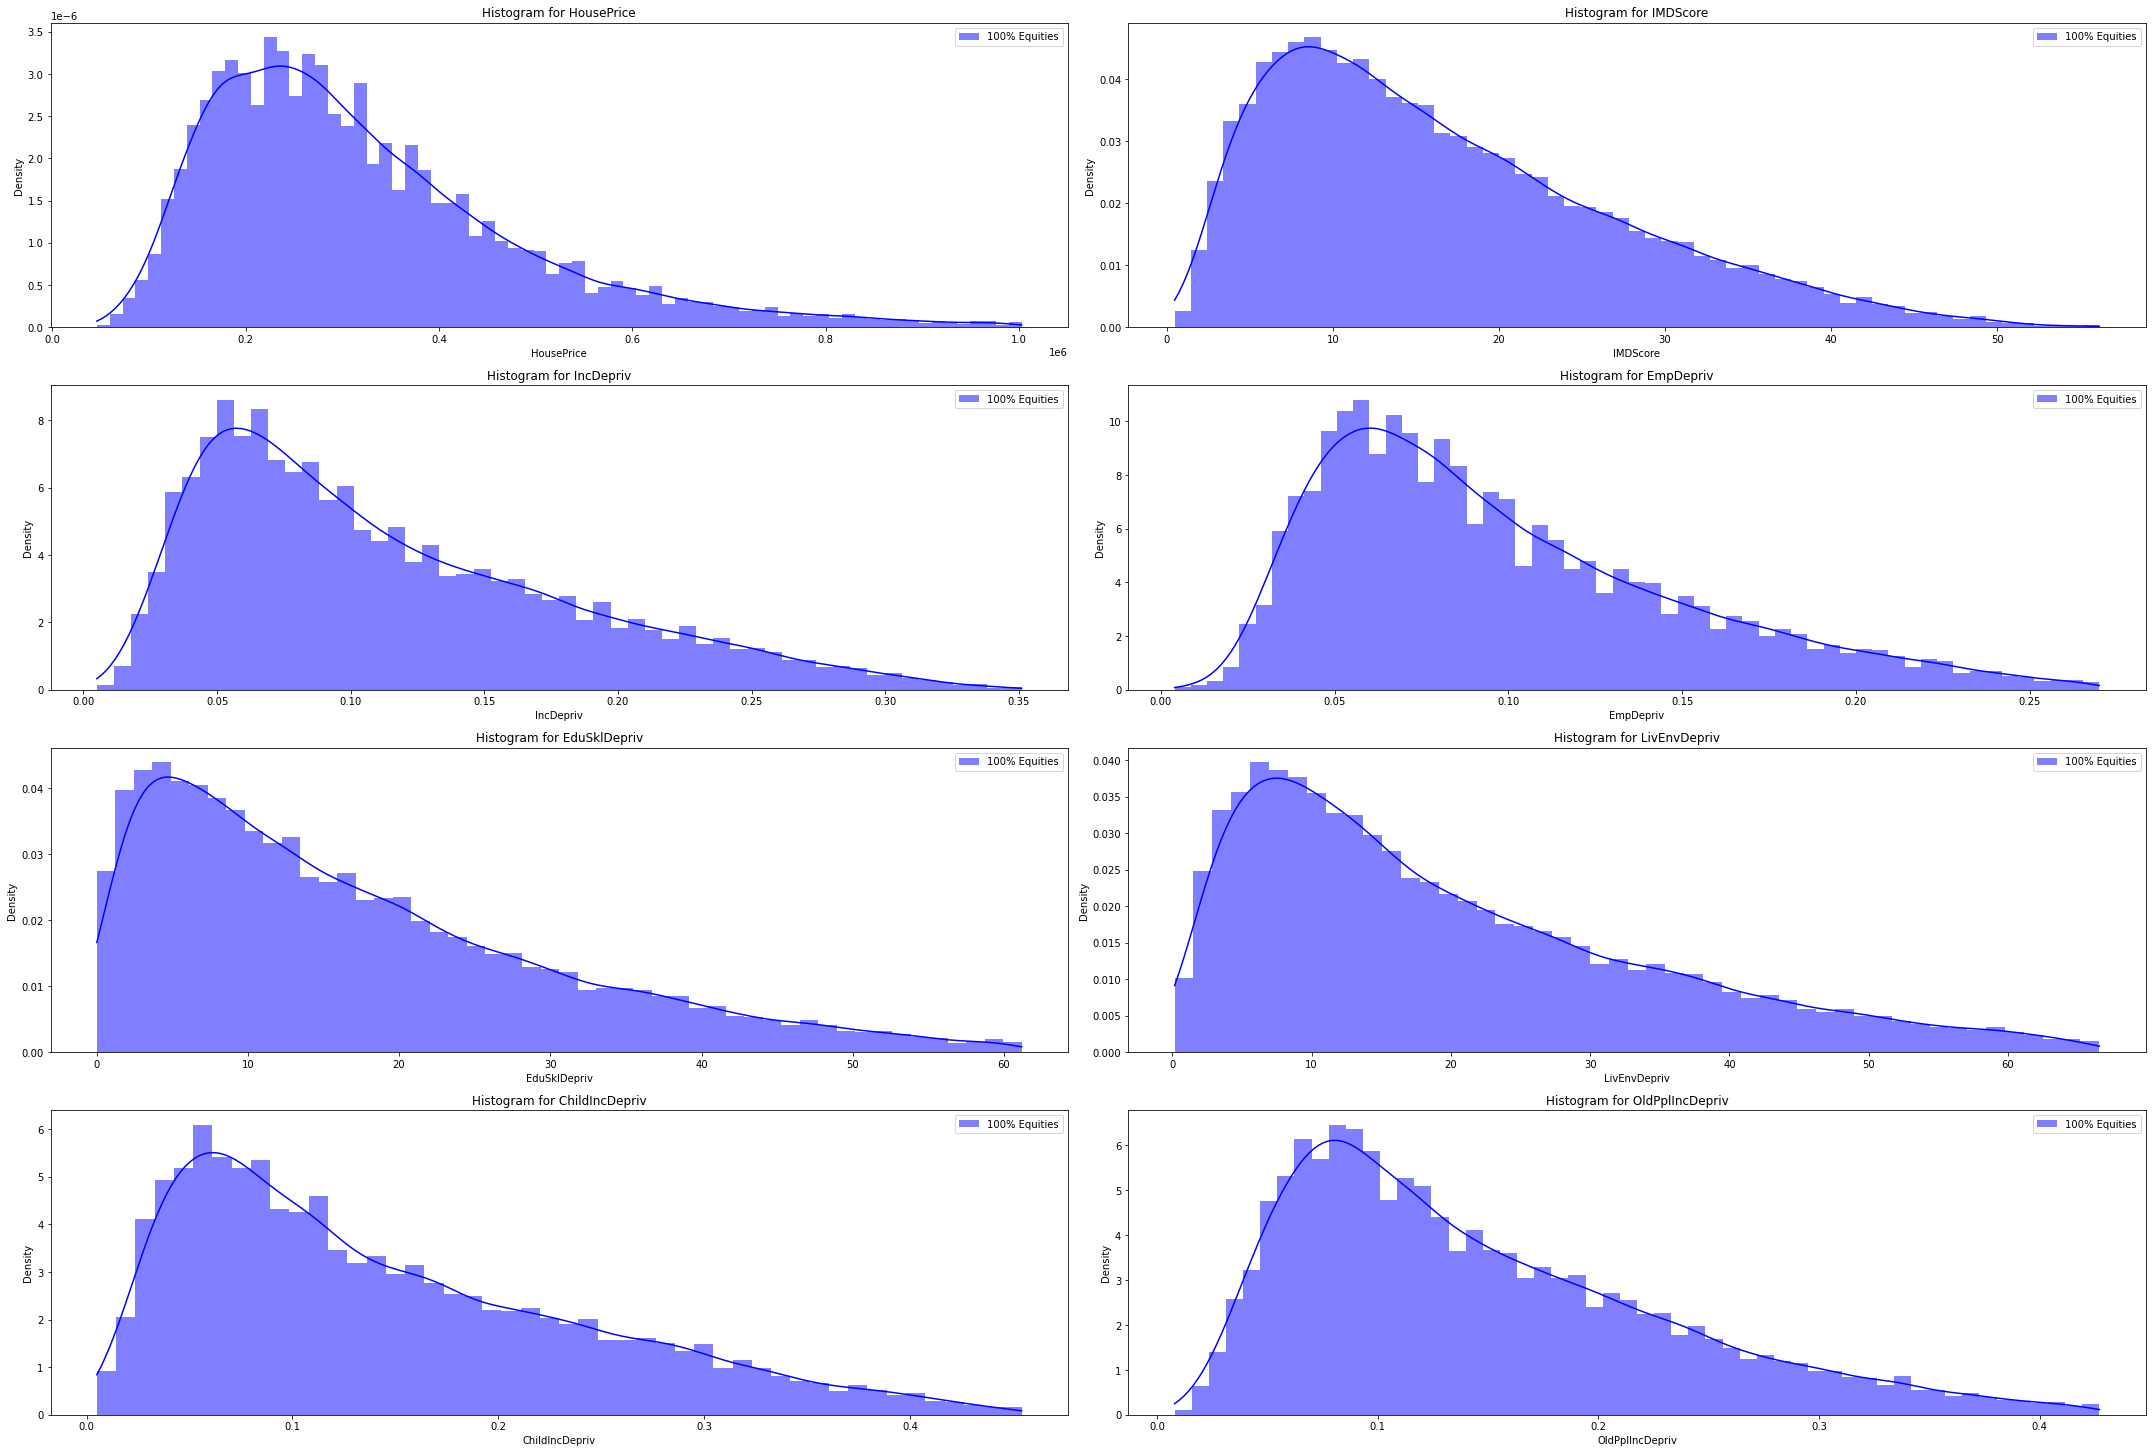

In [132]:
#Now lets view the table
#These ae the features with outliers
columns_with_outliers =  ['HousePrice', 'IMDScore', 'IncDepriv',
                          'EmpDepriv', 'EduSklDepriv','LivEnvDepriv',
                          'ChildIncDepriv','OldPplIncDepriv']

columns_to_plot = columns_with_outliers


num_rows = 8  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_to_plot) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df_no_outliers[column], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove any empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [133]:
#Normalzie all the designated features to normalize here
#When we are normalizing we want to keep the original data untouched so we normalize into a different column
dfp = df_no_outliers #where dfp is dataframe processed
dfp[featuresNormalized] = dfp[allNumericFeatures].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print("finished preprocessing.....")
dfp.head()

finished preprocessing.....


,LSOACode,LSOAName,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,...,HousServDepriv_n,LivEnvDepriv_n,ChildIncDepriv_n,OldPplIncDepriv_n,ChildYPDepriv_n,AdultSklDepriv_n,GeoBarDepriv_n,WiderBarDepriv_n,IndoorDepriv_n,OutdoorDepriv_n
0,E01000001,City of London 001A,840000.0,6.063,0.011,0.015,0.021,-1.918,-1.649,27.134,...,0.433882,0.517217,0.004454,0.026253,0.129314,0.001805,0.424603,0.740624,0.608300,0.739111
1,E01000002,City of London 001B,817500.0,6.255,0.012,0.017,0.040,-1.931,-1.692,26.358,...,0.421269,0.556426,0.002227,0.052506,0.156456,0.005415,0.428737,0.730098,0.665762,0.681185
2,E01000003,City of London 001C,540000.0,19.548,0.105,0.088,9.612,0.321,-0.987,31.861,...,0.510711,0.725529,0.334076,0.362768,0.571345,0.200361,0.398313,0.805925,0.651237,0.843525
3,E01000006,Barking and Dagenham 016A,410000.0,22.568,0.133,0.094,14.525,-0.390,0.746,39.737,...,0.638722,0.456614,0.336303,0.482100,0.477123,0.530686,0.469081,0.840214,0.634796,0.649509
5,E01000011,Barking and Dagenham 016C,415000.0,30.071,0.203,0.102,20.128,-0.040,0.838,48.123,...,0.775022,0.474893,0.645880,0.916468,0.573866,0.546931,0.431878,0.919445,0.634318,0.666373
